# Reaction-diffusion systems

$$ \frac {\partial u}{\partial t} = a \Delta u + u - u^3 - v + k $$
$$ \tau \frac{\partial v}{\partial t} = b \Delta v + u - v $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# CFL condition
$$ dt \le \frac{dx^2}{2} $$

In [2]:
a = 2.8e-4
b = 5e-3
tau = .1
k = -.005

In [3]:
size = 100  # size of the 2D grid
dx = 2./size  # space step
T = 10.0  # total time
dt = .9 * dx**2/2  # time step
n = int(T/dt)

In [4]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)

In [5]:
def laplacian(Z):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop + Zleft + Zbottom + Zright - 4 * Zcenter) / dx**2

In [6]:
# We simulate the PDE with the finite difference method.
for i in range(n):
    # We compute the Laplacian of u and v.
    deltaU = laplacian(U)
    deltaV = laplacian(V)
    # We take the values of u and v inside the grid.
    Uc = U[1:-1,1:-1]
    Vc = V[1:-1,1:-1]
    # We update the variables.
    U[1:-1,1:-1], V[1:-1,1:-1] = \
        Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k), \
        Vc + dt * (b * deltaV + Uc - Vc) / tau
    # Neumann conditions: derivatives at the edges
    # are null.
    for Z in (U, V):
        Z[0,:] = Z[1,:]
        Z[-1,:] = Z[-2,:]
        Z[:,0] = Z[:,1]
        Z[:,-1] = Z[:,-2]

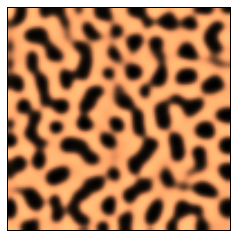

In [7]:
plt.imshow(U, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); plt.yticks([]);

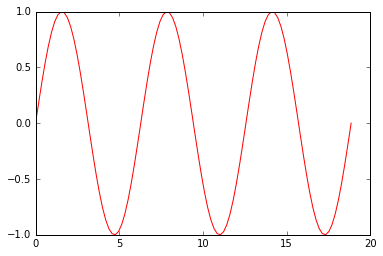

In [21]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)

# You probably won't need this if you're embedding things in a tkinter plot...
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma

for phase in np.linspace(0, 10*np.pi, 500):
    line1.set_ydata(np.sin(x + phase))
    fig.canvas.draw()